In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split


from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2


In [2]:
print(os.listdir('own_dataset/d6/train'))

['5', '1', '4', '3', '6', '2']


In [3]:
train_path= ('own_dataset/d6/train')
test_path= ('own_dataset/d6/test')

In [4]:
batch_size_train=10  #,batch_size= batch_size_train
batch_size_valid=10
targetsize= 50
train_batches= ImageDataGenerator().flow_from_directory(train_path, 
                                                                      target_size=(targetsize,targetsize), 
                                                                      classes=['5', '1', '4', '3', '6', '2'],
                                                                      batch_size= batch_size_train)
test_batches= ImageDataGenerator().flow_from_directory(test_path, 
                                                                     target_size=(targetsize,targetsize), 
                                                                     classes=['5', '1', '4', '3', '6', '2'],
                                                                     batch_size= batch_size_train)

Found 24460 images belonging to 6 classes.
Found 4892 images belonging to 6 classes.


In [5]:
def plots(ims, figsize=(20,10), rows=1, interp= False, titles= None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims= ims.transpose((0,1,2,3))
    f= plt.figure(figsize=figsize)
    cols= len(ims)//rows if len(ims) %2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


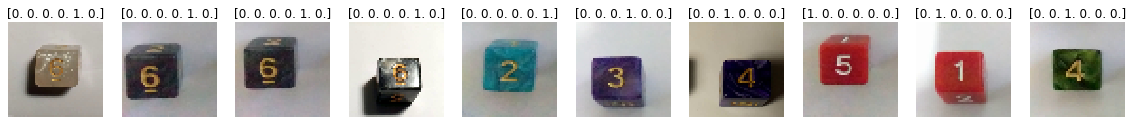

In [6]:
imgs, labels = next(train_batches)
plots(imgs, titles = labels)

In [7]:
labels

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [8]:
imgs.shape

(10, 50, 50, 3)

In [35]:
3*3*3

27

In [37]:
64/2

32.0

In [30]:
a=lambda x: 1e-3 *0.95**x

In [33]:
a(10)

0.0005987369392383787

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten

"""
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(targetsize,targetsize, 3)) )
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.summary()



Epoch 14/15
1429/1429 - 367s - loss: 0.0032 - accuracy: 0.9996 - val_loss: 8.2472e-04 - val_accuracy: 0.9999
Epoch 15/15
1429/1429 - 365s - loss: 0.0061 - accuracy: 0.9985 - val_loss: 3.3384e-04 - val_accuracy: 1.0000


"""

"\nmodel = Sequential()\nmodel.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(targetsize,targetsize, 3)) )\nmodel.add(Conv2D(64, (5, 5), activation='relu'))\nmodel.add(Conv2D(64, (5, 5), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\n\nmodel.add(Flatten())\nmodel.add(Dense(6, activation='softmax'))\nmodel.summary()\n\n\n\nEpoch 14/15\n1429/1429 - 367s - loss: 0.0032 - accuracy: 0.9996 - val_loss: 8.2472e-04 - val_accuracy: 0.9999\nEpoch 15/15\n1429/1429 - 365s - loss: 0.0061 - accuracy: 0.9985 - val_loss: 3.3384e-04 - val_accuracy: 1.0000\n\n\n"

In [10]:

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(targetsize,targetsize, 3)) )
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 203142    
Total params: 255,302
Trainable params: 255,302
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 203142    
Total params: 255,302
Trainable params: 255,302
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics= ['accuracy'])
history= model.fit(train_batches, steps_per_epoch= len(train_batches) ,
                             validation_data=train_batches, validation_steps= len(train_batches), 
                             epochs=15, verbose=2)

Epoch 1/15
2446/2446 - 524s - loss: 0.9846 - accuracy: 0.8834 - val_loss: 0.1246 - val_accuracy: 0.9516
Epoch 2/15
2446/2446 - 526s - loss: 0.0570 - accuracy: 0.9847 - val_loss: 0.0493 - val_accuracy: 0.9865
Epoch 3/15
2446/2446 - 518s - loss: 0.0257 - accuracy: 0.9937 - val_loss: 0.0597 - val_accuracy: 0.9830
Epoch 4/15
2446/2446 - 521s - loss: 0.0194 - accuracy: 0.9949 - val_loss: 6.2180e-04 - val_accuracy: 1.0000
Epoch 5/15
2446/2446 - 527s - loss: 0.0240 - accuracy: 0.9950 - val_loss: 9.4983e-04 - val_accuracy: 0.9998
Epoch 6/15
2446/2446 - 512s - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 7/15
2446/2446 - 515s - loss: 0.0114 - accuracy: 0.9973 - val_loss: 0.0107 - val_accuracy: 0.9982
Epoch 8/15
2446/2446 - 526s - loss: 0.0162 - accuracy: 0.9971 - val_loss: 0.0306 - val_accuracy: 0.9947
Epoch 9/15
2446/2446 - 506s - loss: 8.8839e-04 - accuracy: 0.9997 - val_loss: 4.6262e-05 - val_accuracy: 1.0000
Epoch 10/15
2446/2446 - 522s - loss: 2.6483e-05 

In [13]:
cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=os.getcwd(),save_weights_only=True,verbose=1)

In [14]:
model.save('/home/ordovas/IRONHACK/dice-scores-recognition/model_straight.h5')

In [38]:
model

In [66]:
lnk="/home/ordovas/IRONHACK/dice-scores-recognition/own_dataset/d6/train/3/VID_20201209_200859_1_2.jpg"

img_pru = cv2.imread(lnk)
resized = cv2.resize(img_pru, (50,50), interpolation = cv2.INTER_AREA)

In [67]:
np.array( [resized,]).shape

(1, 50, 50, 3)

In [68]:
model.predict_classes( np.array( [resized,]) ) 

array([3])